<a href="https://colab.research.google.com/github/athirah-o/Video_Game_Sales_EDA/blob/main/DataScience_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on Video Games Sales**

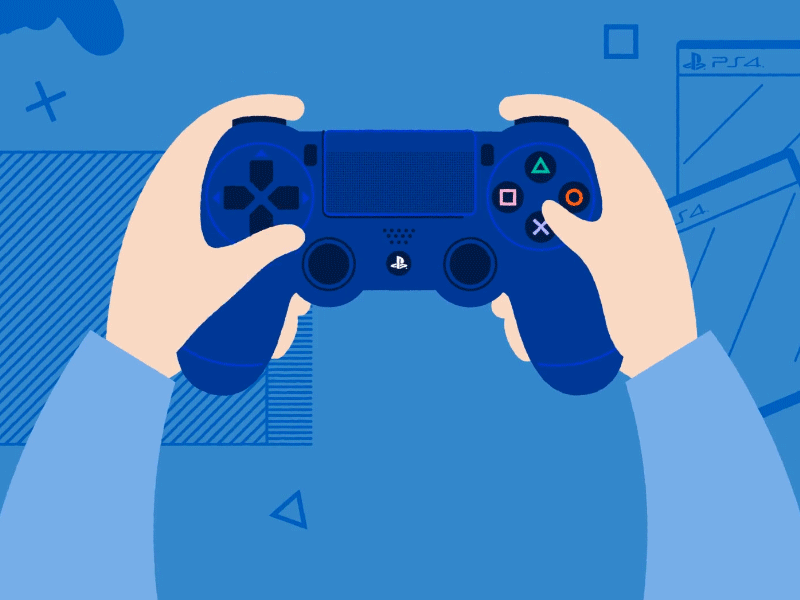

## **Content**

> A.  Introduction

> B.  What we would like to find from this analysis?

> C. Info on dataset

> D.  Data loading

> E.  Data cleaning

> F.  Summary of Data

> G.  Results and discussion: Analyzing data through visualization
1.  The most popular platform and genre
2.  The highest selling game in each year
3.  Analysis of regional sales
4.  Publisher analysis

> H. Conclusion


# **A. Introduction**



> Video games have begun its journey in the 1950s and 1960s when computer scientists experimenting designing a simple games and simulations on minicomputers and mainframes. This lead the creation of Spacewars! in 1962 by MIT student which is the first recognized video games and could be consider as the stepping stone of modern era video games. Current time, the gaming industry is evaluated worth more than 300 billion dollars driven by an increased of mobile gaming and emphasis on social interaction during the COVID-19 pandemic.

> From this analysis, we aim to gain insights on video games sales of 1980-2016.
By exploring through the column of Name, Platform, Publisher and Number of Sales, we can see the trend and pattern in the video gaming industry for the past decades. With this analysis, we can gain a brief history of gaming industry and how the market evolve through out the year.





# **B. What we would like to find from this analysis?**

1. The most popular platform and genre from the year 1980-2016
2. The highest selling game in each year
3. Identify which market/region dominated the gaming industry
4. To explore the distribution of sales in each region
5. Discover the top 10 publisher in terms of global sale and compare sales distribution

# **C. Info on Dataset**

The dataset contain a list of video games with sales greater that 100,000 copies from 1980 - 2020. However, we will only use the information up until year 2016 and information that exceed 2016 will be removed during data cleaning process. The dataset contains 11 features, the name and details are as below:



*   Rank - Ranking of overall sales, integer
*   Name - The games name, object
*   Platform - Platform of the games release (i.e. PC,PS4, etc.), object
*   Year - Year of the game's release, float
*   Genre - Genre of the game ,object
*   Publisher - Publisher of the game
*   NA_Sales - Sales in North America (in millions)
*   EU_Sales - Sales in Europe (in millions)
*   JP_Sales - Sales in Japan (in millions)
*   Other_Sales - Sales in the rest of the world (in millions)
*   Global_Sales - Total worldwide sales.



# **D. Data Loading**

In [ ]:
# import necessary package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load csv file

url = "http://tinyurl.com/ys9z5h74"

df = pd.read_csv(url)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# **E. Data Cleaning**
*   Drop rows which contain info above the year 2016
*   Drop unwanted columns for analysis (drop "Rank" column)
*   Check for null values
*   Change data type for column "Year" from float into interger





In [ ]:
# drop info of the year above 2016 from our dataframe

drop_row_index = df[df['Year'] > 2016].index
df = df.drop(drop_row_index)

In [ ]:
# drop "Rank" column from dataframe

df = df.drop("Rank", axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16594 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16594 non-null  object 
 1   Platform      16594 non-null  object 
 2   Year          16323 non-null  float64
 3   Genre         16594 non-null  object 
 4   Publisher     16536 non-null  object 
 5   NA_Sales      16594 non-null  float64
 6   EU_Sales      16594 non-null  float64
 7   JP_Sales      16594 non-null  float64
 8   Other_Sales   16594 non-null  float64
 9   Global_Sales  16594 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [ ]:
#check for null value
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16427,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Percentage of missing value out of number of rows
((271 + 58) / df.shape[0])*100

1.982644329275642

Since the missing value is only around 2% of total data, hence ok to drop the missing value.

In [ ]:
# Drop rows with at least 1 missing value
df = df.dropna()

In [ ]:
# To reassure the missing value is drop
df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
# Convert "Year" data type into interger

df = df.astype({"Year" : int})
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# **F. Summary of Data**

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000
mean,2006.402775,0.265695,0.147768,0.078849,0.048437,0.541022
std,5.830382,0.822525,0.509360,0.311916,0.190105,1.567520
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# **Results and discussion: Analyzing data through visualization**

# **1. The most popular platform and genre (1980 - 2016)**

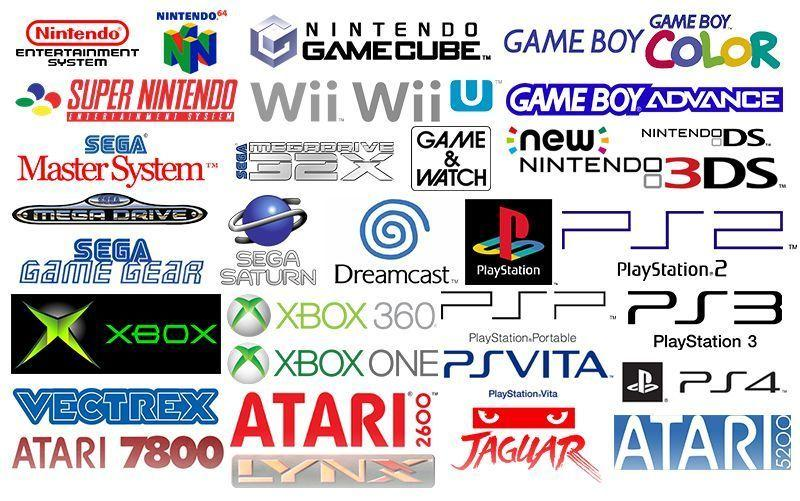

### **i. The most popular platform**

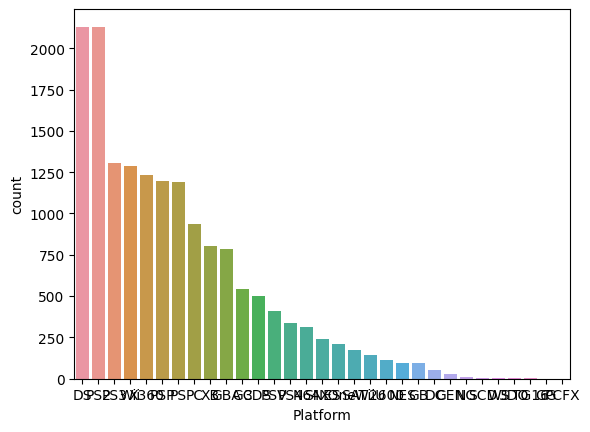

In [ ]:
# top platform
sns.countplot(df, x="Platform", order = df["Platform"].value_counts().index)
sns.set(rc={'figure.figsize':(18,8)});

**Insights:**

*   From the above bar plot, we can see the most popular platform is Nintendo DS and PlayStation 2 which have the highest number of game released on these platform.
*   This also reflect the popularity of these consoles as Nintendo DS is the best-selling handheld game console and PS2 is the best-selling video game console of all time.
*   Consoles which are not developed by mega giant gaming company like Nintendo and Sony such as SCD, WS, 3DO, TG16, GG, PCFX have fewer number of game released on this platform which reflect the consumer preference in the gaming industry.






### **ii. The most popular genre**

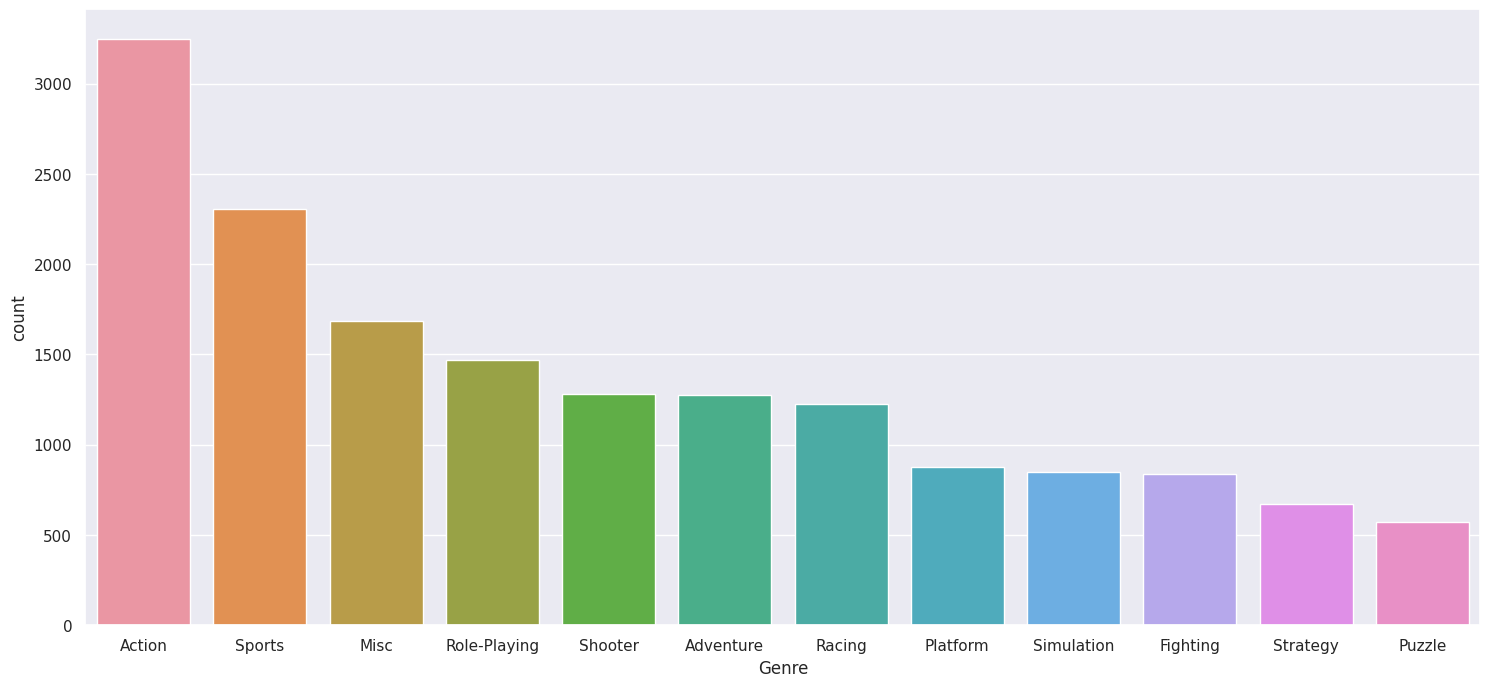

In [ ]:
# top genre
sns.countplot(df, x="Genre", order = df["Genre"].value_counts().index)
sns.set(rc={'figure.figsize':(18,8)});

**Insights:**

*   Above bar plot shows action game has the highest number of game released from 1980-2016 followed by sports and misc.
*   Playing video game is usually associated with male gender and action and sport as the most popular genre resonates with this association.
* Action games often involve combat, shooting, platforming, stealth, racing, or other fast-paced gameplay. Action games are popular among gamers of all ages and preferences, as they offer excitement, variety, and challenge.
* Similar with action games, sport games offer the same excitement but with the addition of spirit of competition and social interaction as sport games is commonly played with other people.


# **2. The highest selling game in each year**

In [ ]:
# create new data frame that shows games with the highest global sales in each year

top_game = df[['Name', 'Platform', 'Year', 'Global_Sales']]
tpgame = top_game.groupby(["Year", "Name"], as_index = False)["Global_Sales"].sum().groupby("Year").apply(lambda x: x.nlargest(1,"Global_Sales")).reset_index(drop=True)
tpgame

,Year,Name,Global_Sales
0,1980,Asteroids,4.31
1,1981,Pitfall!,4.50
2,1982,Pac-Man,7.81
3,1983,Baseball,3.20
4,1984,Duck Hunt,28.31
5,1985,Super Mario Bros.,40.24
6,1986,The Legend of Zelda,6.51
7,1987,Zelda II: The Adventure of Link,4.38
8,1988,Super Mario Bros. 3,17.28
9,1989,Tetris,30.26


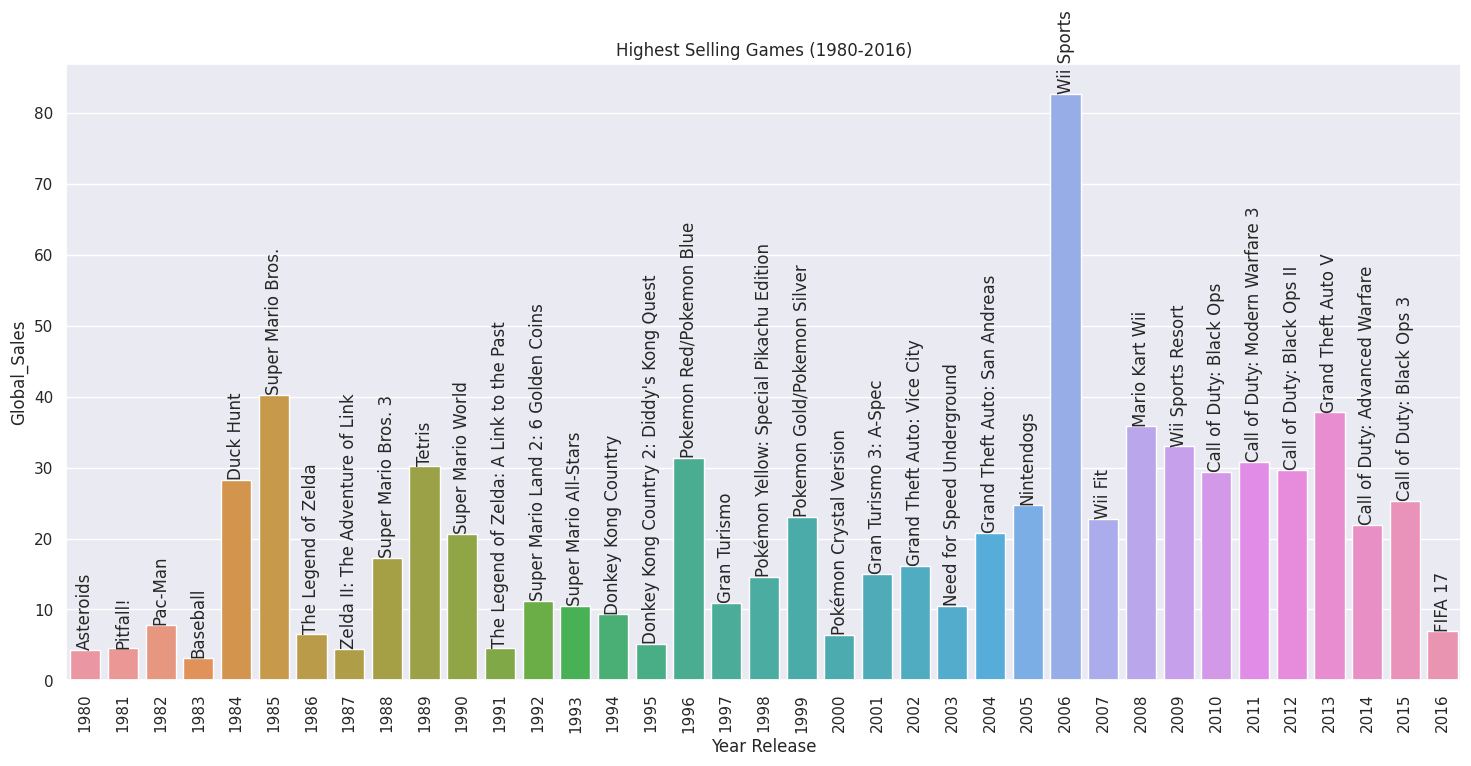

In [ ]:
g = sns.barplot(x='Year', y='Global_Sales', data=tpgame)
g.bar_label(g.containers[0], labels = tpgame["Name"], rotation = 90)
plt.title("Highest Selling Games (1980-2016)")
plt.xlabel("Year Release")
plt.xticks(rotation=90);

**Insights:**

*   From the above bar plot, Wii Sports is the highest selling game by a huge margin compared to other games.
*   Wii Sports is the best selling individual Nintendo game with more than 80 million copies sold worldwide which even beat Nintendo's blockbuster franchise such as Super Mario, The Legend of Zelda and Pokemon.
*   The popularity of Wii Sports comes as it took advantage of Wii's capability for motion controls which was new and exciting feature at the time.
*   If we look closely the highest selling games from 1985 until 2000 are mostly dominated by Nintendo's game franchise such as Super Mario, The Legend of Zelda and Pokemon.
* This shows the dominance of Nintendo in the late 1980's and in 1990's with the birth of well beloved franchise until the release of PlayStation console by Sony in the late 1990's.






# **3. Analysis of regional sales**

### **i. Total sales by region**

In [ ]:
# Create new table that shows the accumulation of each region sales from 1980-2016

tot_sales_reg = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
tot_sales_reg = pd.DataFrame(tot_sales_reg)
tot_sales_reg.columns = ["Total Sales"]
tot_sales_reg

,Total Sales
NA_Sales,4327.38
EU_Sales,2406.69
JP_Sales,1284.22
Other_Sales,788.89


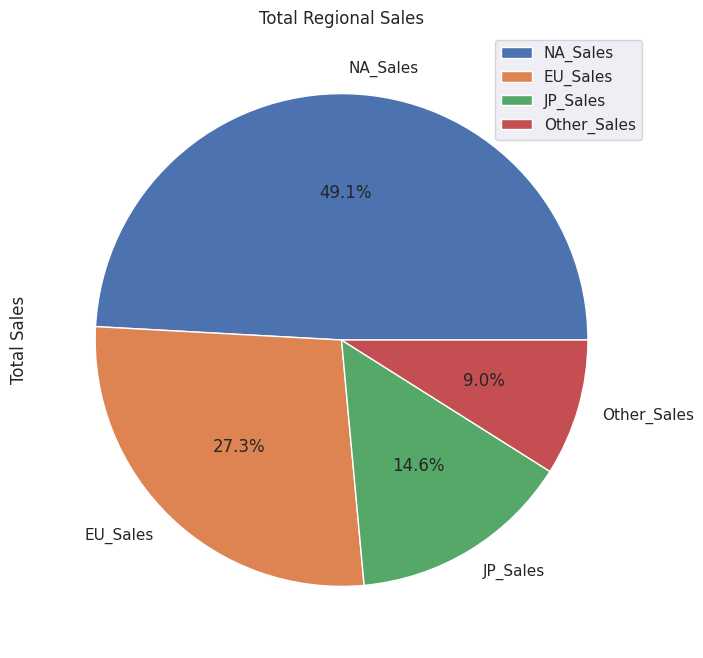

In [ ]:
tot_sales_reg.plot.pie(y="Total Sales", title = "Total Regional Sales", autopct = "%1.1f%%");

**Insights:**

*   North America dominates at 49.1% of total sales, while Europe is the second at 27.3%, Japan at 14.6% and lastly other region is at 9%.
*   This sales ratio reflects on North America as one of the largest and most lucrative gaming markets in the world, with an estimated market size of USD 68.57 billion in 2024 and a projected growth rate of 8.65% from 2024 to 2029.
* Other reason why North America dominated the gaming market is because of larger population and more diverse target consumer.

### **ii. The distribution of sales of each region**

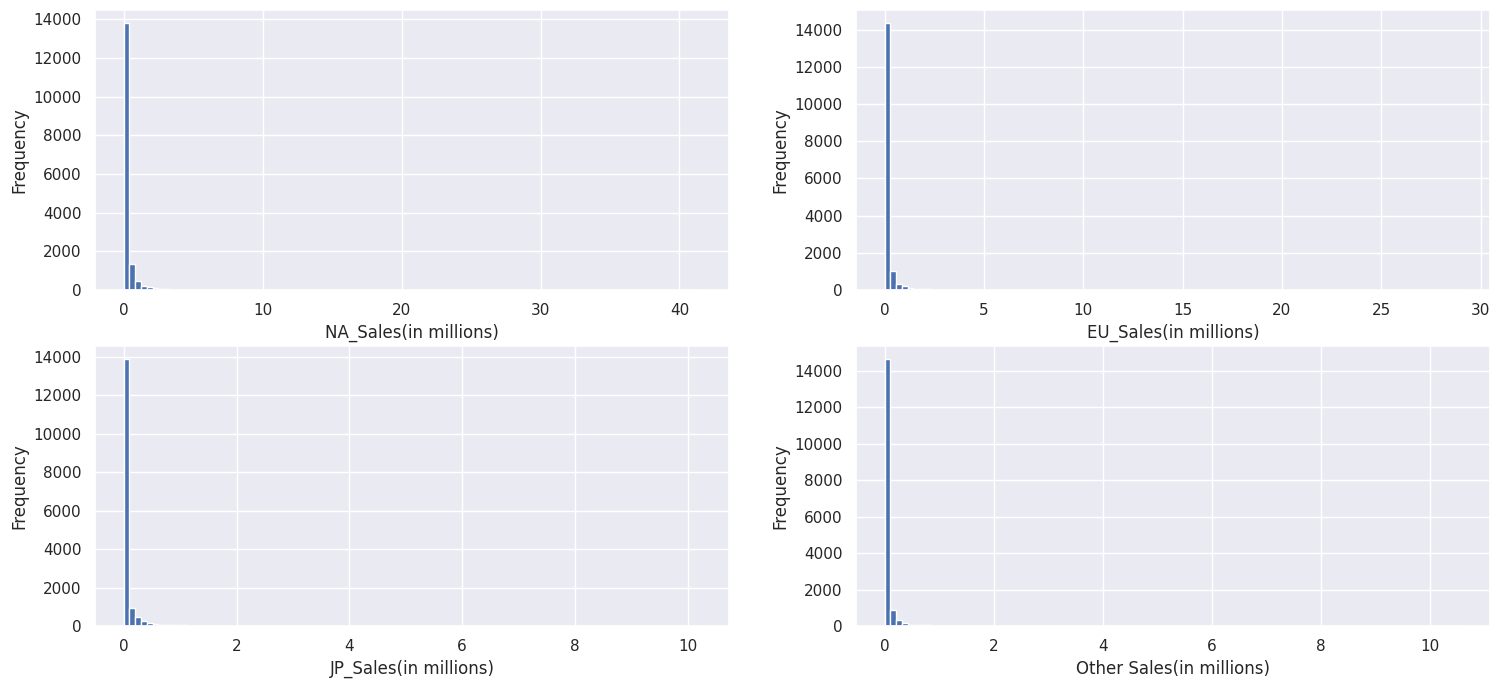

In [ ]:
fig, axes = plt.subplots(2,2)

df["NA_Sales"].plot.hist(ax = axes[0,0], bins=100).set_xlabel("NA_Sales(in millions)")
df["EU_Sales"].plot.hist(ax = axes[0,1], bins=100).set_xlabel("EU_Sales(in millions)")
df["JP_Sales"].plot.hist(ax = axes[1,0], bins=100).set_xlabel("JP_Sales(in millions)")
df["Other_Sales"].plot.hist(ax = axes[1,1], bins=100).set_xlabel("Other Sales(in millions)");

**Insights**


*   Above plot shows all region has right skewed from their sales distribution
*   Mostly games are sold in each region around 0 - 1 million copies and only a few surpass the 1st million mark.



### **iii. Total sales per year by region**

In [ ]:
# create new data frame with only columns year and sales region
# groupby year to display the summation of sales in each region per year

yearsales_data = df[["Year","NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"]]
yearsales_data = yearsales_data.groupby(["Year"])[["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"]].sum().reset_index()
yearsales_data

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980,10.59,0.67,0.00,0.12
1,1981,33.40,1.96,0.00,0.32
2,1982,26.92,1.65,0.00,0.31
3,1983,7.76,0.80,8.10,0.14
4,1984,33.28,2.10,14.27,0.70
5,1985,33.73,4.74,14.56,0.92
6,1986,12.50,2.84,19.81,1.93
7,1987,8.46,1.41,11.63,0.20
8,1988,23.87,6.59,15.76,0.99
9,1989,45.15,8.44,18.36,1.50


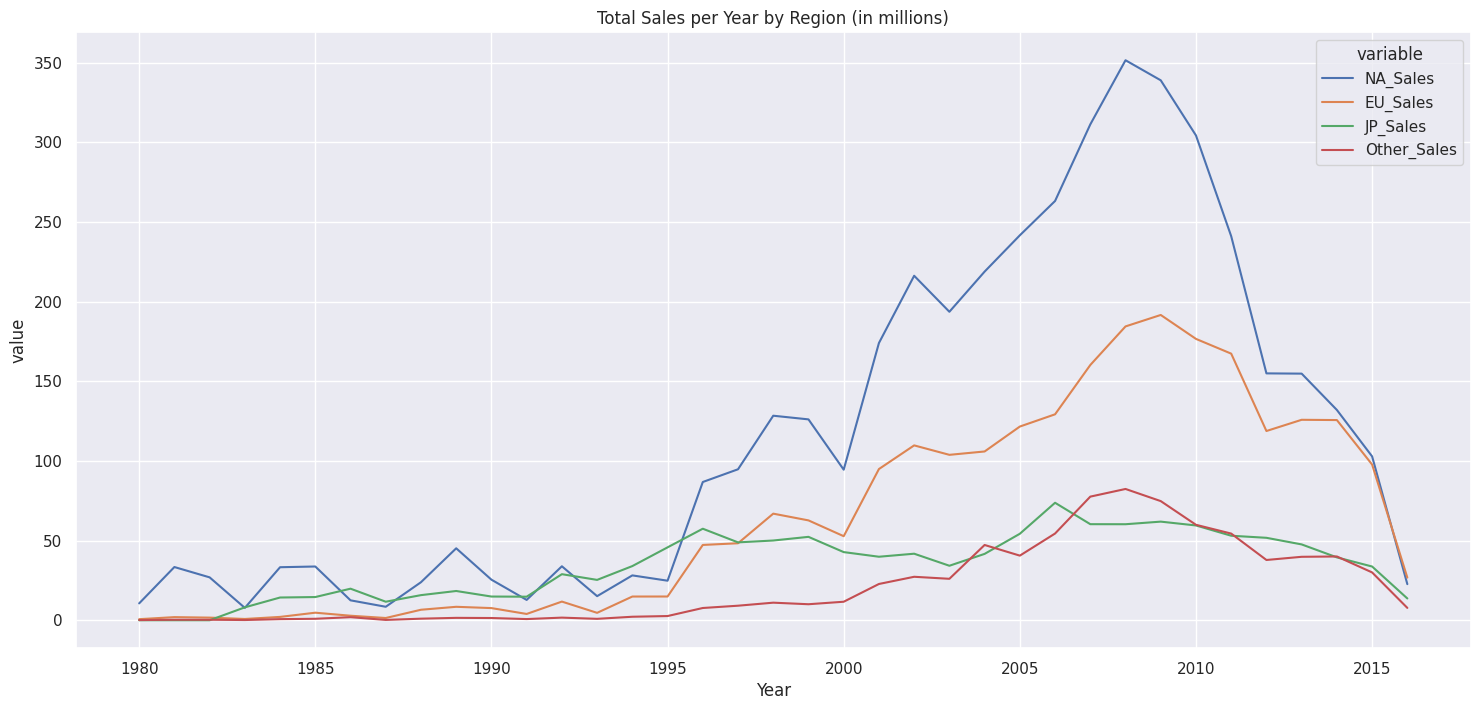

In [ ]:
sns.lineplot(x='Year', y='value', hue='variable',
             data=pd.melt(yearsales_data, ['Year'])).set(title = "Total Sales per Year by Region (in millions)");


**Insights:**

*   Above line plot shows the trend of each regional sales over the year from 1980-2016.
*   North America had higher number of sales since the 1980 and clearly have up and down in the early days until it continue to surge after 1995.
*    Japan had a steady sales momentum until around year 1996 as Europe region surpass Japan's sales by a miles and continue to grow.
* The increased of sale after 1995 from each region in theory due to the birth of more advanced technology such ad 3D graphic capability that enhanced gaming experience. During this time also, the role of internet as a marketing tool has boosted the gaming market tremendously.
* The peak sale is around 2010 may because of several reason such as released of highly anticipated games such as Call of Duty and the innovation and diversity of game genres, platforms, and modes.


# **4.  Publisher analysis**

### **i. Top 10 publisher**

In [ ]:
# to check how many publisher listed in the dataset

len(df["Publisher"].unique())

576

In [ ]:
#Top 10 publisher in terms of Global_sales

top_salespublisher = df.groupby(["Publisher"])["Global_Sales"].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
top10publisher = top_salespublisher.iloc[0:10]
top10publisher

,Publisher,Global_Sales
359,Nintendo,1784.43
138,Electronic Arts,1093.39
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.25
493,Take-Two Interactive,399.30
487,THQ,340.44
275,Konami Digital Entertainment,278.56
445,Sega,270.66
347,Namco Bandai Games,253.65


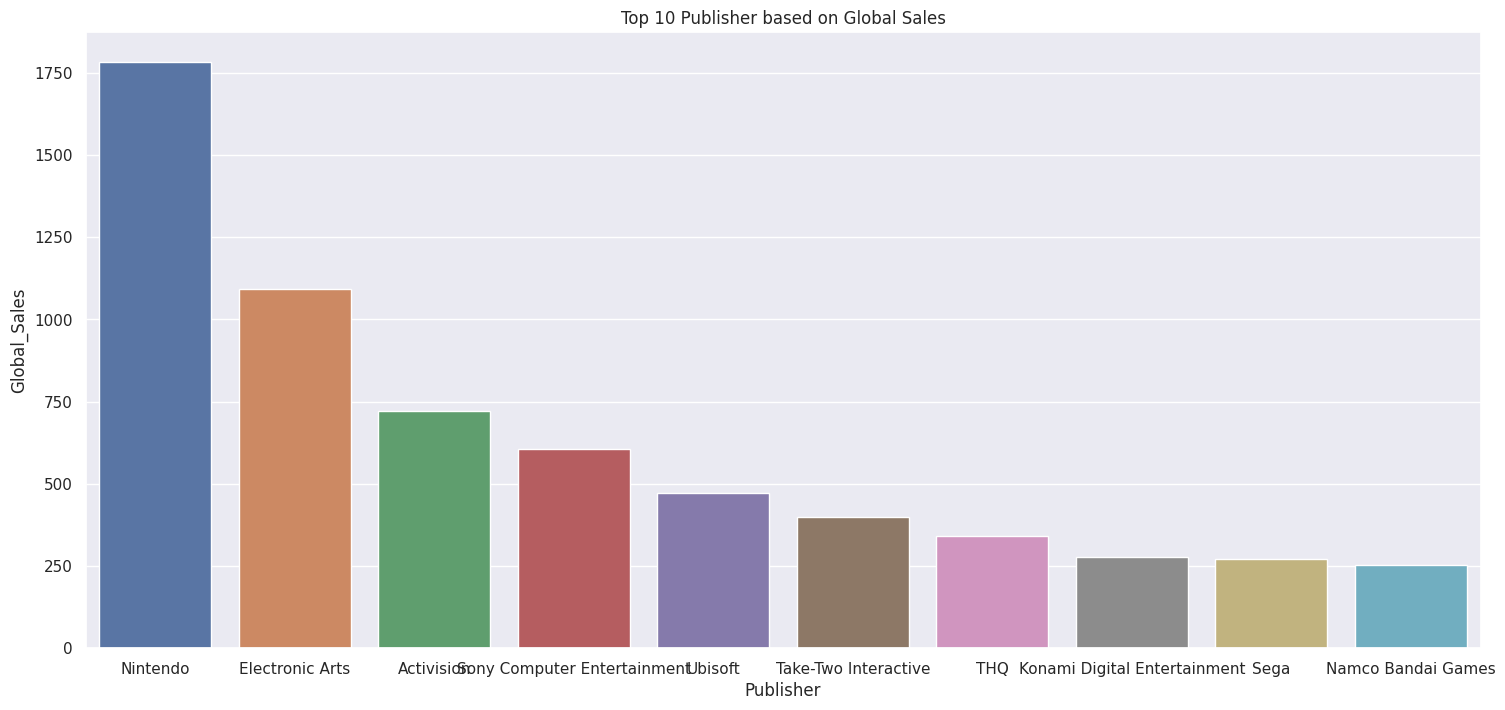

In [ ]:
sns.barplot(top10publisher, x = "Publisher", y = "Global_Sales").set(title = "Top 10 Publisher based on Global Sales");

**Insights:**

*   From the above bar plot, it shows Nintendo has the highest accumulated global sales for 36 years of observation followed by Electronic Arts and Activision.
*   This info can relate back to the highest selling game in each year which already mentioned Nintendo is the leading gaming industry which created several blockbuster franchise such as Super Mario, The Legend of Zelda, Donkey Kong and Pokemon. Nintendo also dominates the market in the 1990 with its super beloved franchise which still relevant until today.
* EA is a publisher that well known for its sport game such FIFA, Madden NFL and NBA 2K. Since, sports is the second popular games genre, it reflects a publisher such as EA will have a high amount of games sell over the years.
* Activision is a video game publisher and developer that has produced many popular games, such as the Call of Duty franchise and Crash Bandicoot. Call of Duty has dominate the gaming market in the 2010's which align with the info that activision as the third highest selling publisher.



### **ii. Distribution of sales by each publisher**

In [ ]:
# to identify the name of each 10 publisher

top10publisher["Publisher"].unique()

array(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive',
       'THQ', 'Konami Digital Entertainment', 'Sega',
       'Namco Bandai Games'], dtype=object)

In [ ]:
#Top 10 publisher in terms of Global_sales

df_10publisher = df.loc[df['Publisher'].isin(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive',
       'THQ', 'Konami Digital Entertainment', 'Sega',
       'Namco Bandai Games'])]
df_10publisher

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16567,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16568,XI Coliseum,PSP,2006,Puzzle,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16584,Bust-A-Move 3000,GC,2003,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01
16591,Myst IV: Revelation,PC,2004,Adventure,Ubisoft,0.01,0.00,0.00,0.00,0.01


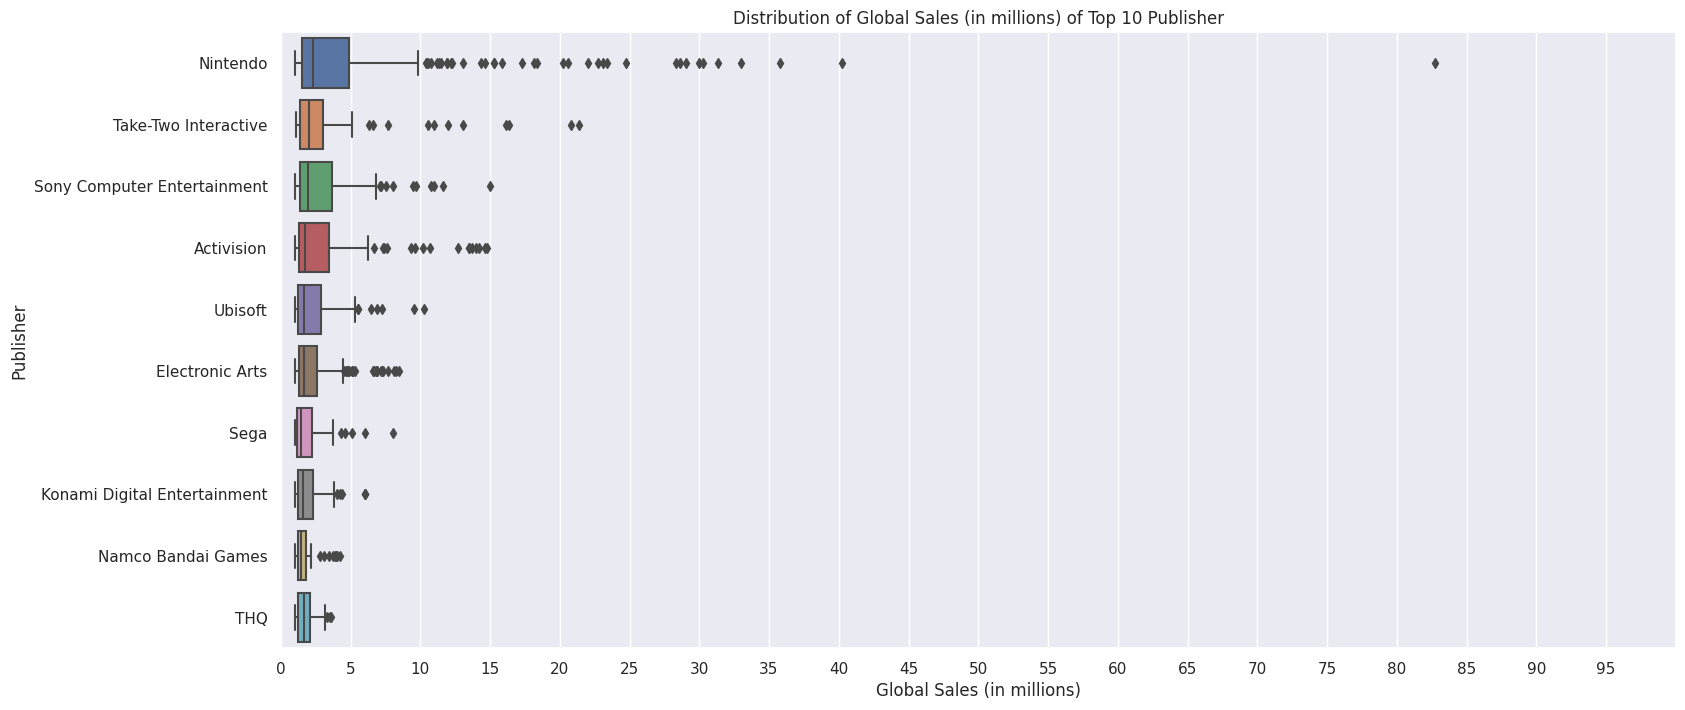

In [ ]:
# Box plot
pbox = sns.boxplot(x = "Global_Sales", y = "Publisher", data = df_10publisher[df_10publisher.Global_Sales > 1])
pbox.set(title = "Distribution of Global Sales (in millions) of Top 10 Publisher", xlabel = "Global Sales (in millions)")
pbox.set_xlim(0,100)
plt.xticks(range(0,100,5));


**Insights:**

*   From the above box plot, we can see the mean of amount of games sold by all of these publisher were almost the same, slightly above 1 millions copies
*   The outliers represent games that sold much more better than other games released by respective publisher.
* In this illustration, 75% of Nintendo games sold better than other publisher. It also has the most point of outliers which indicates there are many games that sold extremely well and believe its comes from franchise such as Super Mario and Pokemon.
* This graph shows that each publisher has released game that sold extremely well and these publishers can identify which game and analyse why this game sold extremely well compared to others.



# **Conclusion**

> In conclusion, our analysis of video games sales gives valuable insights of the gaming  industry. From the analysis, we discover that Nintendo DS and PlayStation 2 are the most popular platform as they have the highest number of game released on their platform. Other than that, action and sport are the most popular genre as it reflect by the number of game released in this genre. Besides, Wii Sport is the highest selling game in terms of global sale and it is one of the most successful title by Nintendo. Next, we identify North America as the biggest gaming market in the gaming industry and view 2010 as the peak of gaming industry because of advancement of technology. Lastly, Nintendo emerged as the leading game publisher and already dominates the industry since the 1980. With this analysis and insights, we can see how the gaming industry has evolve and what is the current market preference on video games. This will help consumer and game developer in making more informed decision towards future gaming buying and creation.

